In [1]:
import numpy as np
import matplotlib.pyplot as plt
import f90nml
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import axes3d

In [2]:
#Read namelist file and assign parameters
parameters = f90nml.read('box_parameters.namelist')
file_name = parameters['output']['output_file']
L_x, L_y = parameters['box']['length']
rho_0 = parameters['charge_distribution']['rho_zero']
x_0, y_0 = parameters['charge_distribution']['center']
R_x, R_y = parameters['charge_distribution']['width']
N = parameters['sampling']['n_max']


In [3]:
#Unpack data file and set variables
solution = np.loadtxt(file_name, skiprows = 1, unpack = True)
x = solution[0]
y = solution[1]
V = solution[2:N + 2]
ones_array = np.ones(N, float)

#Perform an outer product to obtain 2D arrays
X = np.outer(x, ones_array)
Y = np.outer(ones_array, y)

#Set 2D array of zeros to be the the conductor location
conductor = np.zeros((N, N), float)

<ipython-input-4-ac2c751aac82>:8: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  plt.colorbar(cmap = 'plasma', fraction=0.046, pad=0.04)


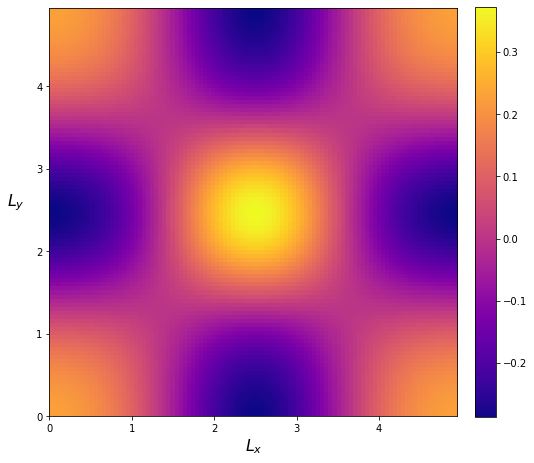

In [4]:
#2D plot of potential
fig, ax = plt.subplots(figsize = (8, 8))
plt.imshow(V, extent =[x[0], x[N - 1], y[0], y[N - 1]], cmap = 'plasma')
plt.xlabel(r'$L_{x}$', fontsize = 16.0)
plt.ylabel(r'$L_{y}$', rotation = 'horizontal', fontsize = 16.0, labelpad = 20)
#plt.title('Potential inside Box', fontsize = 20)
plt.axis('scaled')
plt.colorbar(cmap = 'plasma', fraction=0.046, pad=0.04)
plt.show()

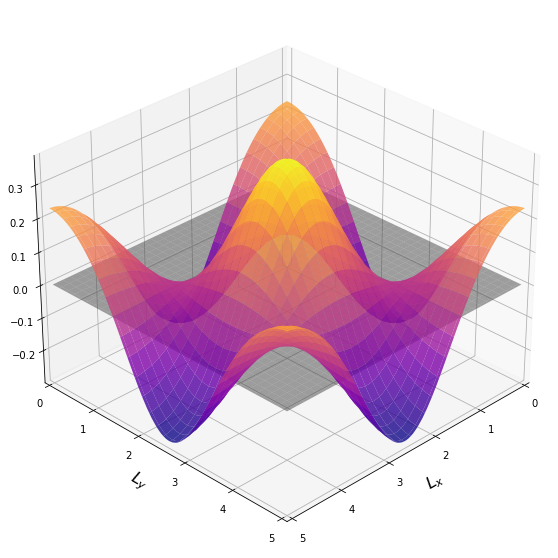

In [5]:
#3D surface plot of potential 
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(X, Y, conductor, color = '#7f7f7f', alpha = 0.5)
ax.plot_surface(X, Y, V, cmap = 'plasma', alpha = 0.8)
displayInterval = 1.0 * np.max([L_x, L_y])
plt.xlim(0, displayInterval)
plt.ylim(0, displayInterval)
plt.xlabel(r'$L_{x}$', fontsize = 16)
plt.ylabel(r'$L_{y}$', fontsize = 16)
ax.view_init(30, 45)
plt.show()



In [6]:
# reading data stored in threads_v_time.dat and serial_time.dat

file_name = 'threads_v_time.dat'
# loadtxt reads all the data in a file and stores them in an array (assuming it's all floats)
all_data = np.loadtxt(file_name)
# We transpose the array in order to be able to extract each column individually
all_data = all_data.transpose()
n_threads = all_data[0]
parallel_time = all_data[1]


file_name = 'serial_time.dat'
# loadtxt reads all the data in a file and stores them in an array (assuming it's all floats)
all_data = np.loadtxt(file_name)
# We transpose the array in order to be able to extract each column individually
all_data = all_data.transpose()
serial_time = all_data[1]

OSError: threads_v_time.dat not found.

In [7]:
from statistics import mean
# get mean of the serial time array
t_serial = mean(serial_time)

# parse parallel time arrays to get the mean to plot 

max_thread = max(n_threads)
slice = int(len(n_threads)/max_thread)

time_1_array = parallel_time[0:slice]
time_2_array = parallel_time[slice:2*slice]
time_3_array = parallel_time[2*slice:3*slice]
time_4_array = parallel_time[3*slice:4*slice]

# build array with average time for each thread
time_array = t_serial/[mean(time_1_array), mean(time_2_array), mean(time_3_array), mean(time_4_array)]

NameError: name 'serial_time' is not defined

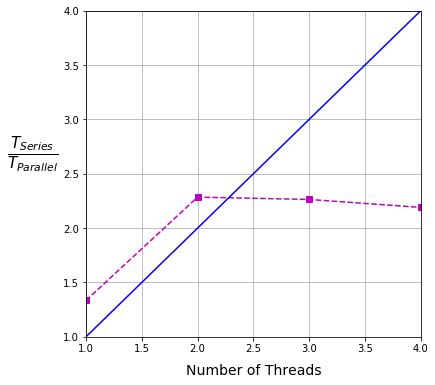

In [43]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize = (6, 6))
# Plotting the Series vs Parallel Comparison Averaged over 10 runs for each
plt.plot(np.unique(n_threads), time_array, linestyle='--', marker = 's', color = 'm')
plt.plot(np.unique(n_threads), np.unique(n_threads), color = 'b')

# Plot Settings
plt.xlabel('Number of Threads', fontsize = 14, labelpad = 10)
plt.xlim(1, max_thread)

plt.ylabel(r'$\frac{T_{Series}}{T_{Parallel}}$', fontsize = 22, rotation = 'horizontal', labelpad = 30)
plt.ylim(1, max_thread)
plt.grid(True)
plt.show()